In [36]:
import protocols 
from matplotlib import pyplot as plt
from setting import Setting

setting = Setting(host_num=3, total_time=100, packet_num=4, max_collision_wait_time=20, p_resend=0.3, packet_size=3, link_delay=1, seed=109611066)
print('aloha')
result = protocols.aloha(setting, True)
print('success_rate:', result[0])
print('idle_rate:', result[1])
print('collision_rate:', result[2])

print('slotted_aloha')
result = protocols.slotted_aloha(setting, True)
print('success_rate:', result[0])
print('idle_rate:', result[1])
print('collision_rate:', result[2])

print('csma')
result = protocols.csma(setting, 0, True)
print('success_rate:', result[0])
print('idle_rate:', result[1])
print('collision_rate:', result[2])

print('csma_cd')
result = protocols.csma_cd(setting, 0, True)
print('success_rate:', result[0])
print('idle_rate:', result[1])
print('collision_rate:', result[2])

aloha
                    V     VV                                                          V                 
h0: ................<---|...............<---><---><---|................<---|...<---|......<---|<---|<---
        V  V                                       V                           V                        
h1: ....<---><--->.................................<---|..........<--->........<---|<--->...............
                     V                                                  V V              V              
h2: .................<---|.........<--->................................<---|...............<---|<---|..
success_rate: 0.35
idle_rate: 0.28
collision_rate: 0.37
slotted_aloha
                    V     VV                                                          V                 
h0: ....................<---|...............<---><---><---|<--->.........................<---|..........
        V  V                                       V                           V    

# Q2

In [37]:
# Q2
success_rate_list = [[],[],[],[]] # order: aloha, slotted_aloha, csma, csma_cd
idle_rate_list = [[],[],[],[]]
collision_rate_list = [[],[],[],[]]
packet_num_list = [1200,800,600,400]
host_num_list = [2,3,4,6]
n = 10
for h, p in zip(host_num_list, packet_num_list):
    success_rate = [0,0,0,0]
    idle_rate = [0,0,0,0]
    collision_rate = [0,0,0,0]
    for s in range(n):
        problem = Setting(host_num=h, packet_num=p, max_collision_wait_time=20, p_resend=0.3)
        # problem = Setting(host_num=h, packet_num=p, coefficient=1)
        # aloha
        result = protocols.aloha(problem)
        success_rate[0] += result[0]
        idle_rate[0] += result[1]
        collision_rate[0] += result[2]
        # slotted_aloha
        result = protocols.slotted_aloha(problem)
        success_rate[1] += result[0]
        idle_rate[1] += result[1]
        collision_rate[1] += result[2]
        # csma
        result = protocols.csma(problem)
        success_rate[2] += result[0]
        idle_rate[2] += result[1]
        collision_rate[2] += result[2]
        # csma_cd
        result = protocols.csma_cd(problem)
        success_rate[3] += result[0]
        idle_rate[3] += result[1]
        collision_rate[3] += result[2]
    
    for i in range(4):
        success_rate_list[i].append(success_rate[i]/n)
        idle_rate_list[i].append(idle_rate[i]/n)
        collision_rate_list[i].append(collision_rate[i]/n)

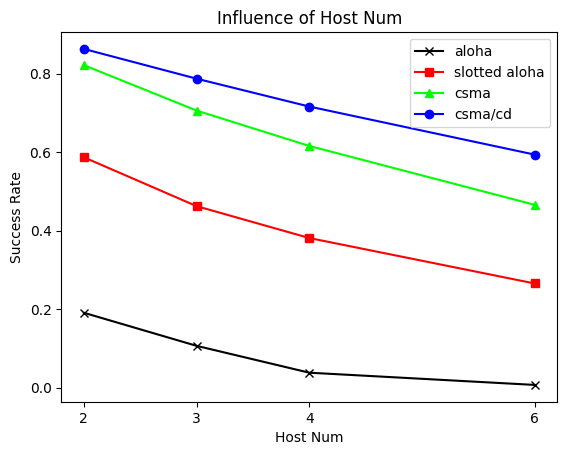

In [38]:
plt.plot(host_num_list, success_rate_list[0], marker='x', label='aloha', color='#000000')
plt.plot(host_num_list, success_rate_list[1], marker='s', label='slotted aloha', color='#ff0000')
plt.plot(host_num_list, success_rate_list[2], marker='^', label='csma', color='#00ff00')
plt.plot(host_num_list, success_rate_list[3], marker='o', label='csma/cd', color='#0000ff')
plt.xlabel('Host Num')
plt.ylabel('Success Rate')
plt.xticks(host_num_list)
plt.title('Influence of Host Num')
plt.legend()
plt.show()

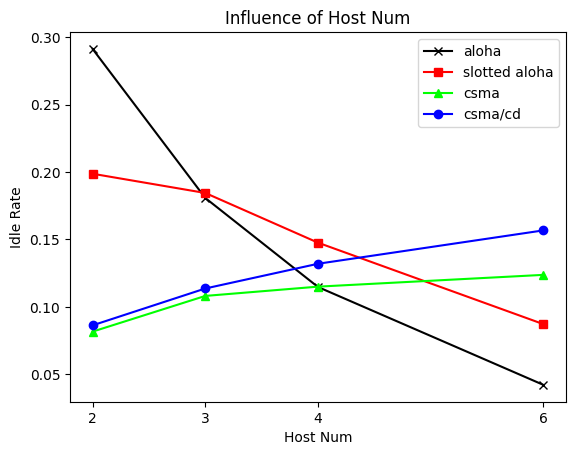

In [39]:
plt.plot(host_num_list, idle_rate_list[0], marker='x', label='aloha', color='#000000')
plt.plot(host_num_list, idle_rate_list[1], marker='s', label='slotted aloha', color='#ff0000')
plt.plot(host_num_list, idle_rate_list[2], marker='^', label='csma', color='#00ff00')
plt.plot(host_num_list, idle_rate_list[3], marker='o', label='csma/cd', color='#0000ff')
plt.xlabel('Host Num')
plt.ylabel('Idle Rate')
plt.xticks(host_num_list)
plt.title('Influence of Host Num')
plt.legend()
plt.show()

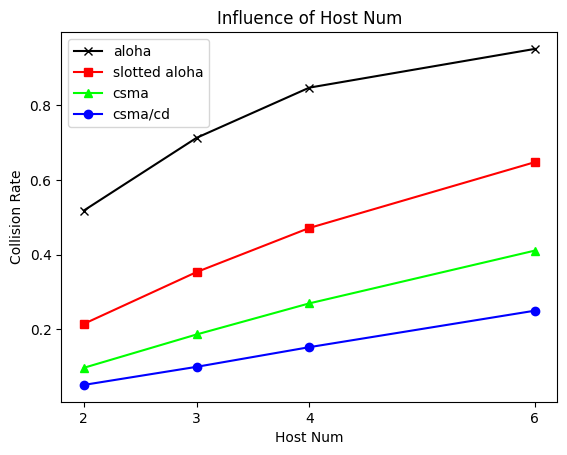

In [40]:
plt.plot(host_num_list, collision_rate_list[0], marker='x', label='aloha', color='#000000')
plt.plot(host_num_list, collision_rate_list[1], marker='s', label='slotted aloha', color='#ff0000')
plt.plot(host_num_list, collision_rate_list[2], marker='^', label='csma', color='#00ff00')
plt.plot(host_num_list, collision_rate_list[3], marker='o', label='csma/cd', color='#0000ff')
plt.xlabel('Host Num')
plt.ylabel('Collision Rate')
plt.xticks(host_num_list)
plt.title('Influence of Host Num')
plt.legend()
plt.show()

# Q3

In [41]:
# Q2
success_rate_list = [[],[],[],[]] # order: aloha, slotted_aloha, csma, csma_cd
idle_rate_list = [[],[],[],[]]
collision_rate_list = [[],[],[],[]]
packet_num_list = [1200,800,600,400]
host_num_list = [2,3,4,6]
n = 10
for h, p in zip(host_num_list, packet_num_list):
    success_rate = [0,0,0,0]
    idle_rate = [0,0,0,0]
    collision_rate = [0,0,0,0]
    for s in range(n):
        # problem = Setting(host_num=h, packet_num=p, max_collision_wait_time=20, p_resend=0.3)
        problem = Setting(host_num=h, packet_num=p, coefficient=1)
        # aloha
        result = protocols.aloha(problem)
        success_rate[0] += result[0]
        idle_rate[0] += result[1]
        collision_rate[0] += result[2]
        # slotted_aloha
        result = protocols.slotted_aloha(problem)
        success_rate[1] += result[0]
        idle_rate[1] += result[1]
        collision_rate[1] += result[2]
        # csma
        result = protocols.csma(problem)
        success_rate[2] += result[0]
        idle_rate[2] += result[1]
        collision_rate[2] += result[2]
        # csma_cd
        result = protocols.csma_cd(problem)
        success_rate[3] += result[0]
        idle_rate[3] += result[1]
        collision_rate[3] += result[2]
    
    for i in range(4):
        success_rate_list[i].append(success_rate[i]/n)
        idle_rate_list[i].append(idle_rate[i]/n)
        collision_rate_list[i].append(collision_rate[i]/n)

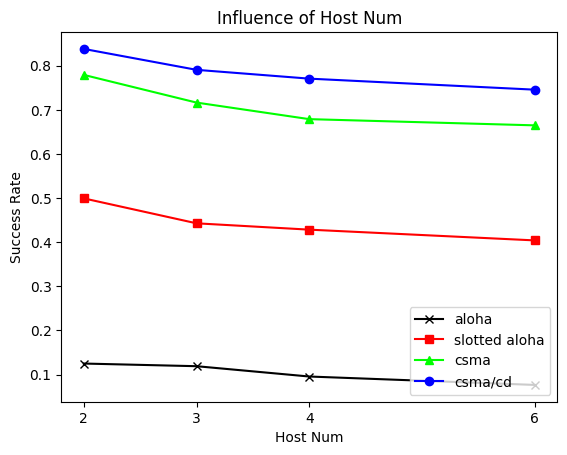

In [42]:
plt.plot(host_num_list, success_rate_list[0], marker='x', label='aloha', color='#000000')
plt.plot(host_num_list, success_rate_list[1], marker='s', label='slotted aloha', color='#ff0000')
plt.plot(host_num_list, success_rate_list[2], marker='^', label='csma', color='#00ff00')
plt.plot(host_num_list, success_rate_list[3], marker='o', label='csma/cd', color='#0000ff')
plt.xlabel('Host Num')
plt.ylabel('Success Rate')
plt.xticks(host_num_list)
plt.title('Influence of Host Num')
plt.legend()
plt.show()

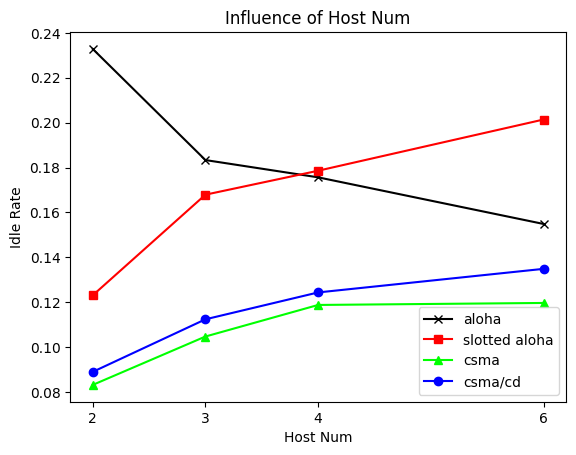

In [43]:
plt.plot(host_num_list, idle_rate_list[0], marker='x', label='aloha', color='#000000')
plt.plot(host_num_list, idle_rate_list[1], marker='s', label='slotted aloha', color='#ff0000')
plt.plot(host_num_list, idle_rate_list[2], marker='^', label='csma', color='#00ff00')
plt.plot(host_num_list, idle_rate_list[3], marker='o', label='csma/cd', color='#0000ff')
plt.xlabel('Host Num')
plt.ylabel('Idle Rate')
plt.xticks(host_num_list)
plt.title('Influence of Host Num')
plt.legend()
plt.show()

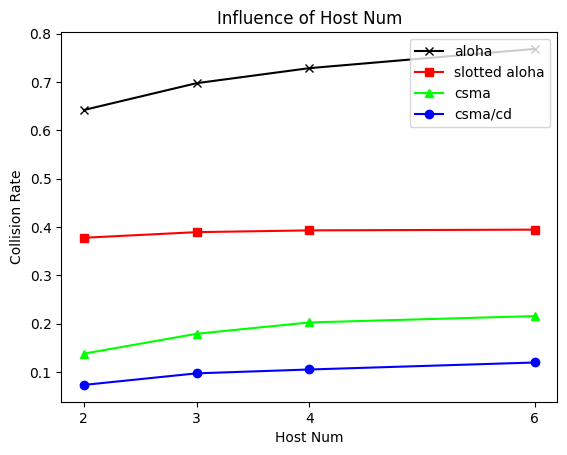

In [44]:
plt.plot(host_num_list, collision_rate_list[0], marker='x', label='aloha', color='#000000')
plt.plot(host_num_list, collision_rate_list[1], marker='s', label='slotted aloha', color='#ff0000')
plt.plot(host_num_list, collision_rate_list[2], marker='^', label='csma', color='#00ff00')
plt.plot(host_num_list, collision_rate_list[3], marker='o', label='csma/cd', color='#0000ff')
plt.xlabel('Host Num')
plt.ylabel('Collision Rate')
plt.xticks(host_num_list)
plt.title('Influence of Host Num')
plt.legend()
plt.show()

# Q4

In [63]:
coefficients = [c for c in range(1, 31)]
success_rate_list = [[],[],[],[]] # order: aloha, slotted_aloha, csma, csma_cd
idle_rate_list = [[],[],[],[]]
collision_rate_list = [[],[],[],[]]
n = 10
for c in coefficients:
    success_rate = [0,0,0,0]
    idle_rate = [0,0,0,0]
    collision_rate = [0,0,0,0]
    for s in range(n):
        problem = Setting(coefficient=c)
        # aloha
        result = protocols.aloha(problem)
        success_rate[0] += result[0]
        idle_rate[0] += result[1]
        collision_rate[0] += result[2]
        # slotted_aloha
        result = protocols.slotted_aloha(problem)
        success_rate[1] += result[0]
        idle_rate[1] += result[1]
        collision_rate[1] += result[2]
        # csma
        result = protocols.csma(problem)
        success_rate[2] += result[0]
        idle_rate[2] += result[1]
        collision_rate[2] += result[2]
        # csma_cd
        result = protocols.csma_cd(problem)
        success_rate[3] += result[0]
        idle_rate[3] += result[1]
        collision_rate[3] += result[2]
    
    for i in range(4):
        success_rate_list[i].append(success_rate[i]/n)
        idle_rate_list[i].append(idle_rate[i]/n)
        collision_rate_list[i].append(collision_rate[i]/n)

## Success Rate

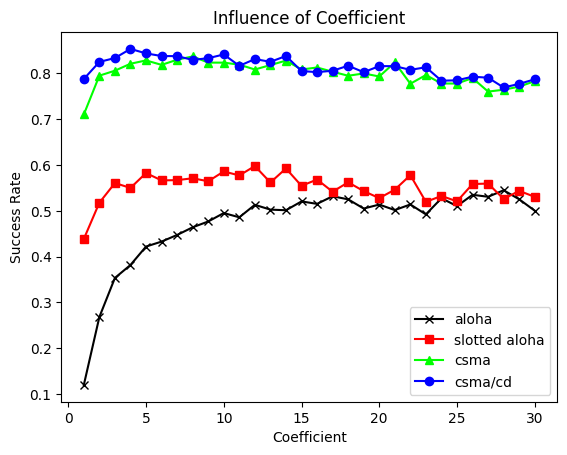

In [64]:
plt.plot(coefficients, success_rate_list[0], marker='x', label='aloha', color='#000000')
plt.plot(coefficients, success_rate_list[1], marker='s', label='slotted aloha', color='#ff0000')
plt.plot(coefficients, success_rate_list[2], marker='^', label='csma', color='#00ff00')
plt.plot(coefficients, success_rate_list[3], marker='o', label='csma/cd', color='#0000ff')
plt.xlabel('Coefficient')
plt.ylabel('Success Rate')
plt.title('Influence of Coefficient')
plt.legend()
plt.show()

## Idle Rate

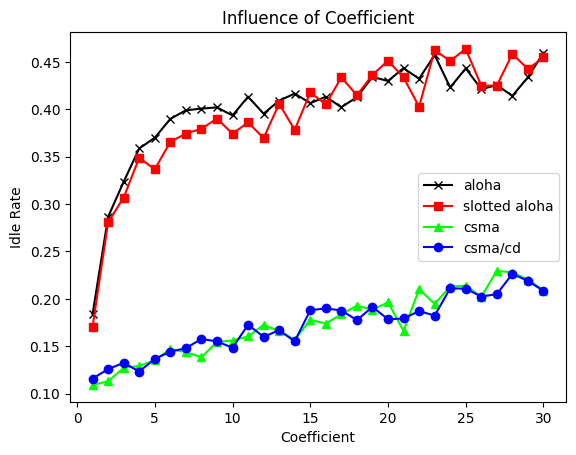

In [65]:
plt.plot(coefficients, idle_rate_list[0], marker='x', label='aloha', color='#000000')
plt.plot(coefficients, idle_rate_list[1], marker='s', label='slotted aloha', color='#ff0000')
plt.plot(coefficients, idle_rate_list[2], marker='^', label='csma', color='#00ff00')
plt.plot(coefficients, idle_rate_list[3], marker='o', label='csma/cd', color='#0000ff')
plt.xlabel('Coefficient')
plt.ylabel('Idle Rate')
plt.title('Influence of Coefficient')
plt.legend()
plt.show()

## Collision Rate

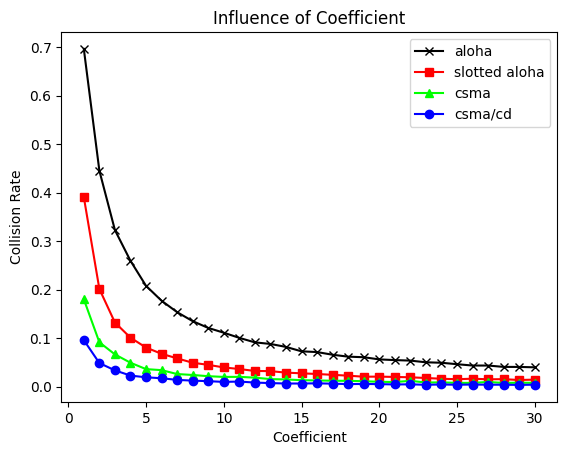

In [66]:
plt.plot(coefficients, collision_rate_list[0], marker='x', label='aloha', color='#000000')
plt.plot(coefficients, collision_rate_list[1], marker='s', label='slotted aloha', color='#ff0000')
plt.plot(coefficients, collision_rate_list[2], marker='^', label='csma', color='#00ff00')
plt.plot(coefficients, collision_rate_list[3], marker='o', label='csma/cd', color='#0000ff')
plt.xlabel('Coefficient')
plt.ylabel('Collision Rate')
plt.title('Influence of Coefficient')
plt.legend()
plt.show()

# Q5

In [67]:
packet_nums = [p for p in range(100, 1050, 50)]
success_rate_list = [[],[],[],[]] # order: aloha, slotted_aloha, csma, csma_cd
idle_rate_list = [[],[],[],[]]
collision_rate_list = [[],[],[],[]]
n = 10
for p in packet_nums:
    success_rate = [0,0,0,0]
    idle_rate = [0,0,0,0]
    collision_rate = [0,0,0,0]
    for s in range(n):
        problem = Setting(packet_num=p)
        # aloha
        result = protocols.aloha(problem)
        success_rate[0] += result[0]
        idle_rate[0] += result[1]
        collision_rate[0] += result[2]
        # slotted_aloha
        result = protocols.slotted_aloha(problem)
        success_rate[1] += result[0]
        idle_rate[1] += result[1]
        collision_rate[1] += result[2]
        # csma
        result = protocols.csma(problem)
        success_rate[2] += result[0]
        idle_rate[2] += result[1]
        collision_rate[2] += result[2]
        # csma_cd
        result = protocols.csma_cd(problem)
        success_rate[3] += result[0]
        idle_rate[3] += result[1]
        collision_rate[3] += result[2]
    
    for i in range(4):
        success_rate_list[i].append(success_rate[i]/n)
        idle_rate_list[i].append(idle_rate[i]/n)
        collision_rate_list[i].append(collision_rate[i]/n)

## 5.1. Success Rate

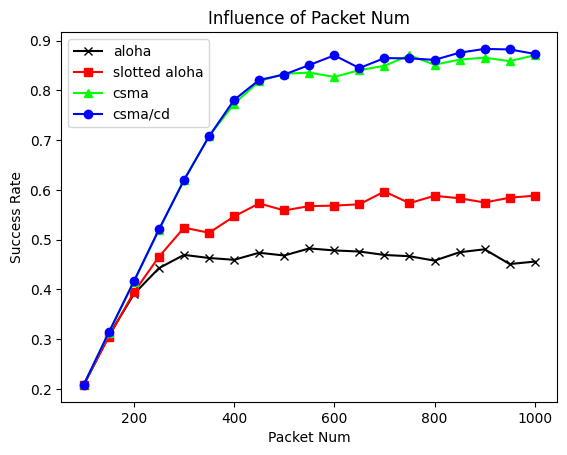

In [68]:
plt.plot(packet_nums, success_rate_list[0], marker='x', label='aloha', color='#000000')
plt.plot(packet_nums, success_rate_list[1], marker='s', label='slotted aloha', color='#ff0000')
plt.plot(packet_nums, success_rate_list[2], marker='^', label='csma', color='#00ff00')
plt.plot(packet_nums, success_rate_list[3], marker='o', label='csma/cd', color='#0000ff')
plt.xlabel('Packet Num')
plt.ylabel('Success Rate')
plt.title('Influence of Packet Num')
plt.legend()
plt.show()

## 5.2. Idle Rate

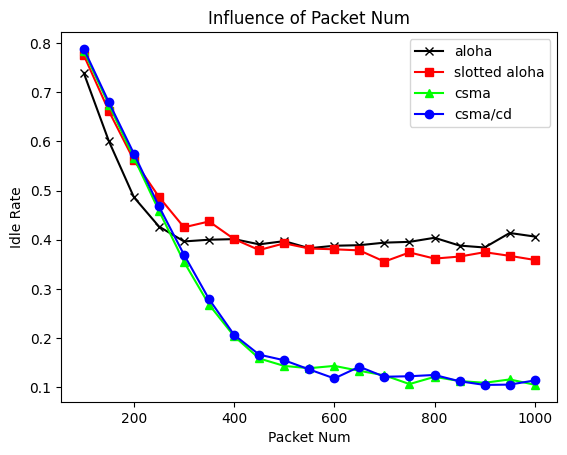

In [69]:
plt.plot(packet_nums, idle_rate_list[0], marker='x', label='aloha', color='#000000')
plt.plot(packet_nums, idle_rate_list[1], marker='s', label='slotted aloha', color='#ff0000')
plt.plot(packet_nums, idle_rate_list[2], marker='^', label='csma', color='#00ff00')
plt.plot(packet_nums, idle_rate_list[3], marker='o', label='csma/cd', color='#0000ff')
plt.xlabel('Packet Num')
plt.ylabel('Idle Rate')
plt.title('Influence of Packet Num')
plt.legend()
plt.show()

## 5.3. Collision Rate

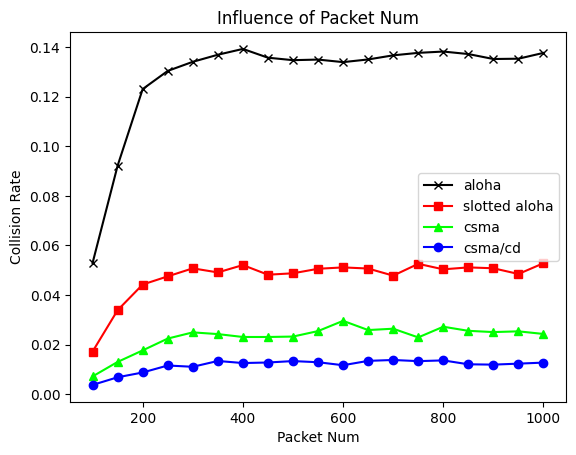

In [70]:
plt.plot(packet_nums, collision_rate_list[0], marker='x', label='aloha', color='#000000')
plt.plot(packet_nums, collision_rate_list[1], marker='s', label='slotted aloha', color='#ff0000')
plt.plot(packet_nums, collision_rate_list[2], marker='^', label='csma', color='#00ff00')
plt.plot(packet_nums, collision_rate_list[3], marker='o', label='csma/cd', color='#0000ff')
plt.xlabel('Packet Num')
plt.ylabel('Collision Rate')
plt.title('Influence of Packet Num')
plt.legend()
plt.show()

# Q6

In [71]:
host_nums = [h for h in range(1, 11)]
success_rate_list = [[],[],[],[]] # order: aloha, slotted_aloha, csma, csma_cd
idle_rate_list = [[],[],[],[]]
collision_rate_list = [[],[],[],[]]
n = 10
for h in host_nums:
    success_rate = [0,0,0,0]
    idle_rate = [0,0,0,0]
    collision_rate = [0,0,0,0]
    for s in range(n):
        problem = Setting(host_num=h)
        # aloha
        result = protocols.aloha(problem)
        success_rate[0] += result[0]
        idle_rate[0] += result[1]
        collision_rate[0] += result[2]
        # slotted_aloha
        result = protocols.slotted_aloha(problem)
        success_rate[1] += result[0]
        idle_rate[1] += result[1]
        collision_rate[1] += result[2]
        # csma
        result = protocols.csma(problem)
        success_rate[2] += result[0]
        idle_rate[2] += result[1]
        collision_rate[2] += result[2]
        # csma_cd
        result = protocols.csma_cd(problem)
        success_rate[3] += result[0]
        idle_rate[3] += result[1]
        collision_rate[3] += result[2]
    
    for i in range(4):
        success_rate_list[i].append(success_rate[i]/n)
        idle_rate_list[i].append(idle_rate[i]/n)
        collision_rate_list[i].append(collision_rate[i]/n)

## 6.1. Success Rate

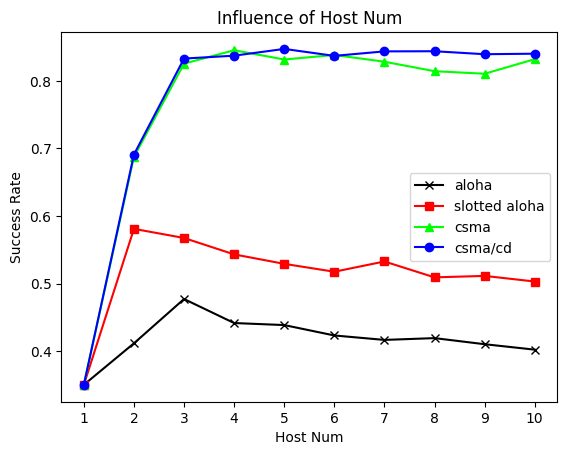

In [72]:
plt.plot(host_nums, success_rate_list[0], marker='x', label='aloha', color='#000000')
plt.plot(host_nums, success_rate_list[1], marker='s', label='slotted aloha', color='#ff0000')
plt.plot(host_nums, success_rate_list[2], marker='^', label='csma', color='#00ff00')
plt.plot(host_nums, success_rate_list[3], marker='o', label='csma/cd', color='#0000ff')
plt.xlabel('Host Num')
plt.ylabel('Success Rate')
plt.xticks(host_nums)
plt.title('Influence of Host Num')
plt.legend()
plt.show()

## 6.2. Idle Rate

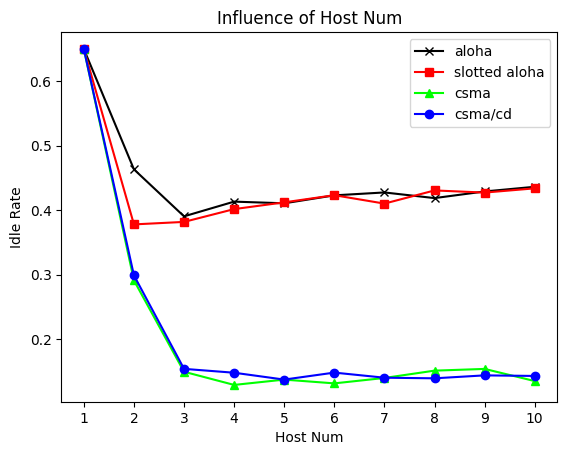

In [73]:
plt.plot(host_nums, idle_rate_list[0], marker='x', label='aloha', color='#000000')
plt.plot(host_nums, idle_rate_list[1], marker='s', label='slotted aloha', color='#ff0000')
plt.plot(host_nums, idle_rate_list[2], marker='^', label='csma', color='#00ff00')
plt.plot(host_nums, idle_rate_list[3], marker='o', label='csma/cd', color='#0000ff')
plt.xlabel('Host Num')
plt.ylabel('Idle Rate')
plt.xticks(host_nums)
plt.title('Influence of Host Num')
plt.legend()
plt.show()

## 6.3. Collision Rate

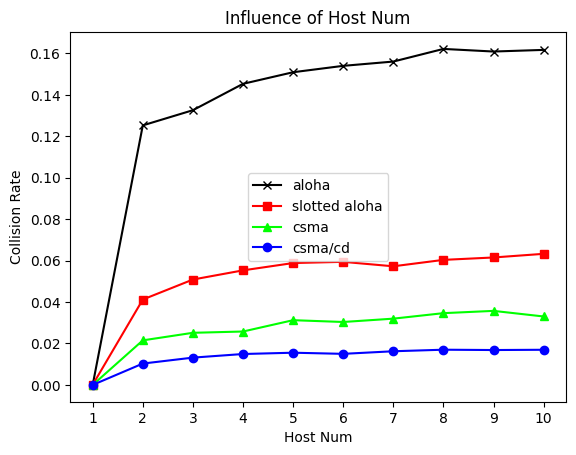

In [74]:
plt.plot(host_nums, collision_rate_list[0], marker='x', label='aloha', color='#000000')
plt.plot(host_nums, collision_rate_list[1], marker='s', label='slotted aloha', color='#ff0000')
plt.plot(host_nums, collision_rate_list[2], marker='^', label='csma', color='#00ff00')
plt.plot(host_nums, collision_rate_list[3], marker='o', label='csma/cd', color='#0000ff')
plt.xlabel('Host Num')
plt.ylabel('Collision Rate')
plt.xticks(host_nums)
plt.title('Influence of Host Num')
plt.legend()
plt.show()

# Q7

In [76]:
packet_sizes = [p for p in range(1, 20)]
success_rate_list = [[],[],[],[]] # order: aloha, slotted_aloha, csma, csma_cd
idle_rate_list = [[],[],[],[]]
collision_rate_list = [[],[],[],[]]
n = 10
for p in packet_sizes:
    success_rate = [0,0,0,0]
    idle_rate = [0,0,0,0]
    collision_rate = [0,0,0,0]
    for s in range(n):
        problem = Setting(packet_size=p)
        # aloha
        result = protocols.aloha(problem)
        success_rate[0] += result[0]
        idle_rate[0] += result[1]
        collision_rate[0] += result[2]
        # slotted_aloha
        result = protocols.slotted_aloha(problem)
        success_rate[1] += result[0]
        idle_rate[1] += result[1]
        collision_rate[1] += result[2]
        # csma
        result = protocols.csma(problem)
        success_rate[2] += result[0]
        idle_rate[2] += result[1]
        collision_rate[2] += result[2]
        # csma_cd
        result = protocols.csma_cd(problem)
        success_rate[3] += result[0]
        idle_rate[3] += result[1]
        collision_rate[3] += result[2]
    
    for i in range(4):
        success_rate_list[i].append(success_rate[i]/n)
        idle_rate_list[i].append(idle_rate[i]/n)
        collision_rate_list[i].append(collision_rate[i]/n)

## 7.1. Success Rate

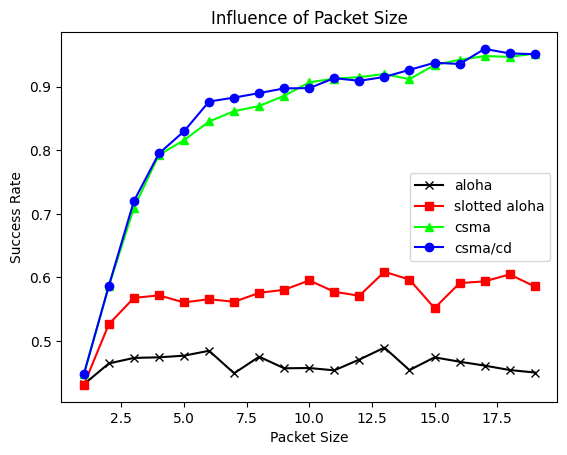

In [77]:
plt.plot(packet_sizes, success_rate_list[0], marker='x', label='aloha', color='#000000')
plt.plot(packet_sizes, success_rate_list[1], marker='s', label='slotted aloha', color='#ff0000')
plt.plot(packet_sizes, success_rate_list[2], marker='^', label='csma', color='#00ff00')
plt.plot(packet_sizes, success_rate_list[3], marker='o', label='csma/cd', color='#0000ff')
plt.xlabel('Packet Size')
plt.ylabel('Success Rate')
plt.title('Influence of Packet Size')
plt.legend()
plt.show()

## 7.2. Idle Rate

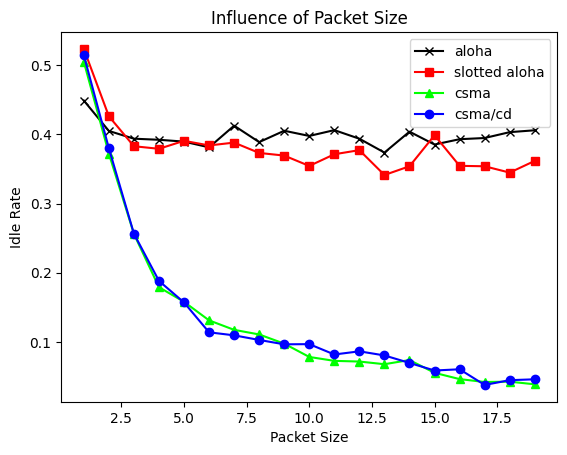

In [78]:
plt.plot(packet_sizes, idle_rate_list[0], marker='x', label='aloha', color='#000000')
plt.plot(packet_sizes, idle_rate_list[1], marker='s', label='slotted aloha', color='#ff0000')
plt.plot(packet_sizes, idle_rate_list[2], marker='^', label='csma', color='#00ff00')
plt.plot(packet_sizes, idle_rate_list[3], marker='o', label='csma/cd', color='#0000ff')
plt.xlabel('Packet Size')
plt.ylabel('Idle Rate')
plt.title('Influence of Packet Size')
plt.legend()
plt.show()

## 7.3. Collision Rate

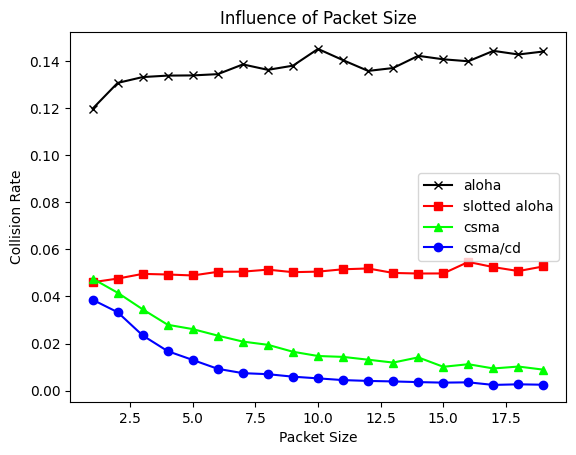

In [79]:
plt.plot(packet_sizes, collision_rate_list[0], marker='x', label='aloha', color='#000000')
plt.plot(packet_sizes, collision_rate_list[1], marker='s', label='slotted aloha', color='#ff0000')
plt.plot(packet_sizes, collision_rate_list[2], marker='^', label='csma', color='#00ff00')
plt.plot(packet_sizes, collision_rate_list[3], marker='o', label='csma/cd', color='#0000ff')
plt.xlabel('Packet Size')
plt.ylabel('Collision Rate')
plt.title('Influence of Packet Size')
plt.legend()
plt.show()

# Q8

In [89]:
link_delay_list = [0, 1, 2, 3]
packet_size_list = [7, 5, 3, 1]
success_rate_list = [[],[],[],[]] # order: aloha, slotted_aloha, csma, csma_cd
idle_rate_list = [[],[],[],[]]
collision_rate_list = [[],[],[],[]]
n = 10
for l, p in zip(link_delay_list, packet_size_list):
    success_rate = [0,0,0,0]
    idle_rate = [0,0,0,0]
    collision_rate = [0,0,0,0]
    for s in range(n):
        problem = Setting(packet_size=p, link_delay=l)
        # aloha
        result = protocols.aloha(problem)
        success_rate[0] += result[0]
        idle_rate[0] += result[1]
        collision_rate[0] += result[2]
        # slotted_aloha
        result = protocols.slotted_aloha(problem)
        success_rate[1] += result[0]
        idle_rate[1] += result[1]
        collision_rate[1] += result[2]
        # csma
        result = protocols.csma(problem)
        success_rate[2] += result[0]
        idle_rate[2] += result[1]
        collision_rate[2] += result[2]
        # csma_cd
        result = protocols.csma_cd(problem)
        success_rate[3] += result[0]
        idle_rate[3] += result[1]
        collision_rate[3] += result[2]
    
    for i in range(4):
        success_rate_list[i].append(success_rate[i]/n)
        idle_rate_list[i].append(idle_rate[i]/n)
        collision_rate_list[i].append(collision_rate[i]/n)

## 8.1. Success Rate

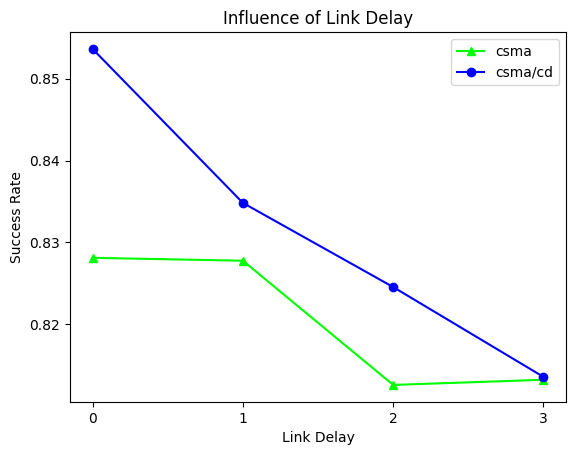

In [90]:
# plt.plot(link_delay_list, success_rate_list[0], marker='x', label='aloha', color='#000000')
# plt.plot(link_delay_list, success_rate_list[1], marker='s', label='slotted aloha', color='#ff0000')
plt.plot(link_delay_list, success_rate_list[2], marker='^', label='csma', color='#00ff00')
plt.plot(link_delay_list, success_rate_list[3], marker='o', label='csma/cd', color='#0000ff')
plt.xlabel('Link Delay')
plt.ylabel('Success Rate')
plt.xticks(link_delay_list)
plt.title('Influence of Link Delay')
plt.legend()
plt.show()

## 8.2. Idle Rate

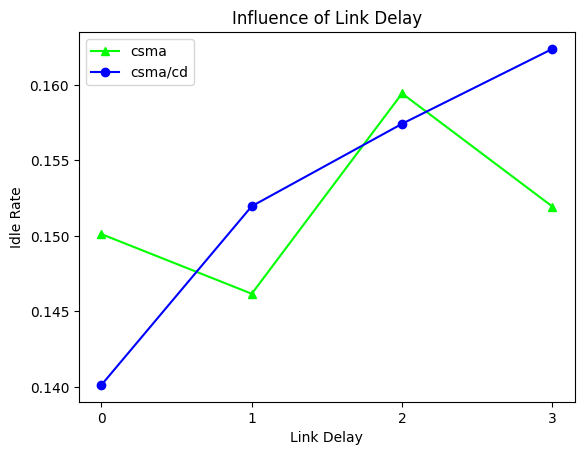

In [91]:
# plt.plot(link_delay_list, idle_rate_list[0], marker='x', label='aloha', color='#000000')
# plt.plot(link_delay_list, idle_rate_list[1], marker='s', label='slotted aloha', color='#ff0000')
plt.plot(link_delay_list, idle_rate_list[2], marker='^', label='csma', color='#00ff00')
plt.plot(link_delay_list, idle_rate_list[3], marker='o', label='csma/cd', color='#0000ff')
plt.xlabel('Link Delay')
plt.ylabel('Idle Rate')
plt.xticks(link_delay_list)
plt.title('Influence of Link Delay')
plt.legend()
plt.show()

## 8.3. Collision Rate

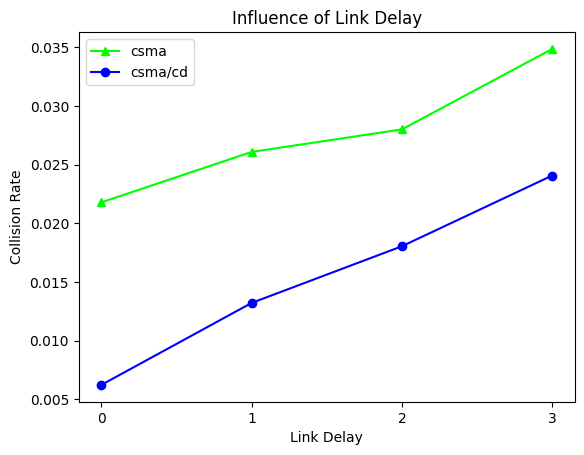

In [92]:
# plt.plot(link_delay_list, collision_rate_list[0], marker='x', label='aloha', color='#000000')
# plt.plot(link_delay_list, collision_rate_list[1], marker='s', label='slotted aloha', color='#ff0000')
plt.plot(link_delay_list, collision_rate_list[2], marker='^', label='csma', color='#00ff00')
plt.plot(link_delay_list, collision_rate_list[3], marker='o', label='csma/cd', color='#0000ff')
plt.xlabel('Link Delay')
plt.ylabel('Collision Rate')
plt.xticks(link_delay_list)
plt.title('Influence of Link Delay')
plt.legend()
plt.show()